# 标签的区域属性
在这个笔记本中，我们根据标签属性的平均值和标准差来表征标签，例如大小。如果相似大小的对象是邻居，它们的大小标准差就低。如果不同大小的标签是邻居，它们的大小标准差就会更高。这可以用来识别组织中不同大小的细胞相遇的区域。

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview

我们在这里使用的数据源自maize_clsm.tif，该数据来自[这里](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif)，这是David Legland在[CC-BY 4.0许可](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE)下共享的图像

StackViewNDArray([[50, 27, 27, ..., 26, 26, 26],
                  [26,  1,  2, ...,  1,  1,  1],
                  [27,  1,  1, ...,  1,  1,  1],
                  ...,
                  [33,  5,  4, ...,  1,  1,  1],
                  [36,  9,  7, ...,  1,  1,  1],
                  [57, 34, 34, ..., 25, 24, 25]], dtype=uint8)
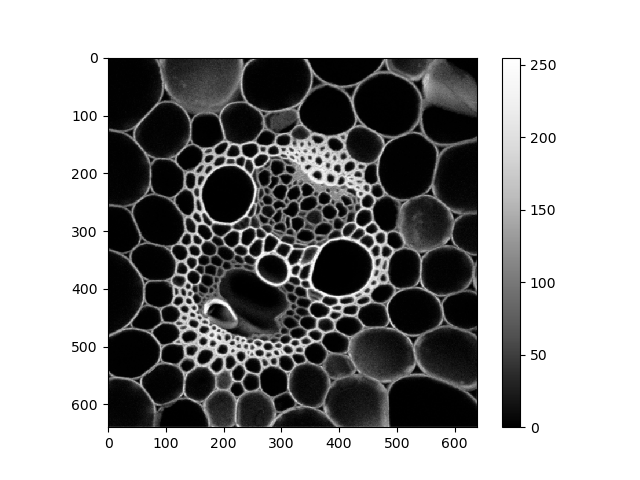
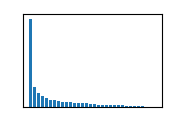

In [2]:
image = imread("../../data/maize_clsm.tif")

stackview.insight(image)

相应的标签图像如下所示：

cl.OCLArray([[  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       ...,
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234]], dtype=uint32)
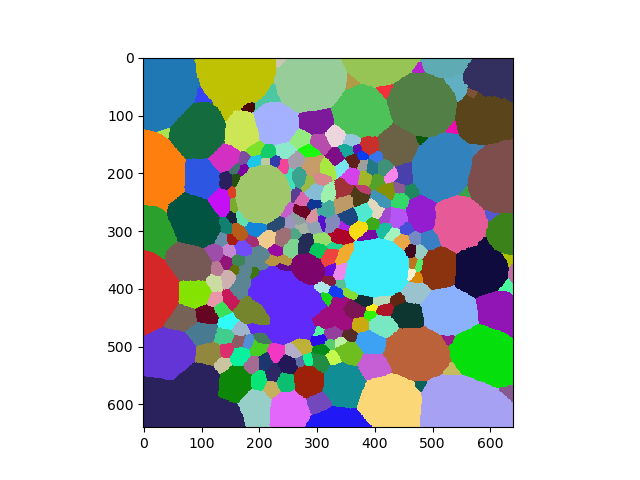

In [3]:
labels = imread("../../data/maize_clsm_labels.tif")
labels = cle.exclude_small_labels(labels, maximum_size=200)
labels = cle.extend_labeling_via_voronoi(labels)
labels

## 测量大小
首先，我们需要量化对象的大小。我们可以立即将这些测量结果可视化为参数图像。

cl.OCLArray([[10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       ...,
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.]],
      dtype=float32)
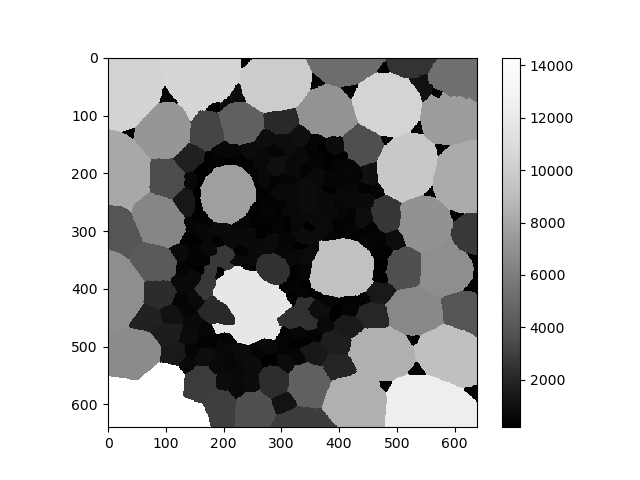
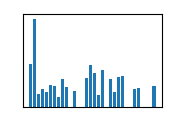

In [4]:
size_map_image = cle.pixel_count_map(labels)

size_map_image

## 区域属性
现在我们可以在局部范围内总结这些测量结果，例如，通过测量每个细胞及其相应接触邻居的平均大小。

cl.OCLArray([[6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       ...,
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ]], dtype=float32)
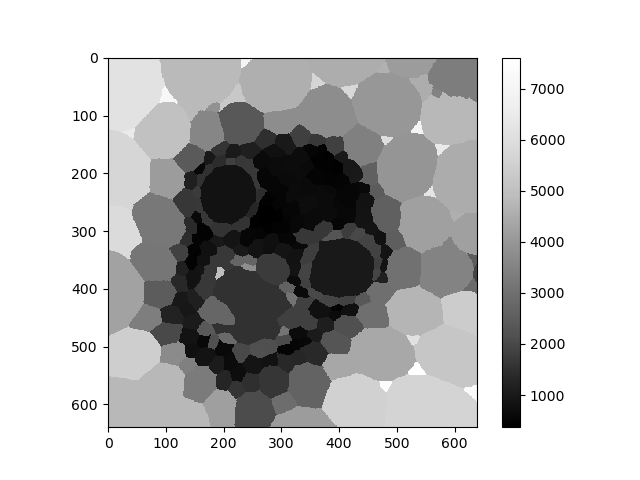
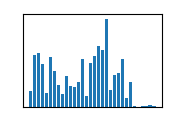

In [5]:
cle.mean_of_touching_neighbors_map(size_map_image, labels)

我们还可以计算大小的标准差，这突出了不同大小的细胞区域之间的边界。

cl.OCLArray([[3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       ...,
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436]], dtype=float32)
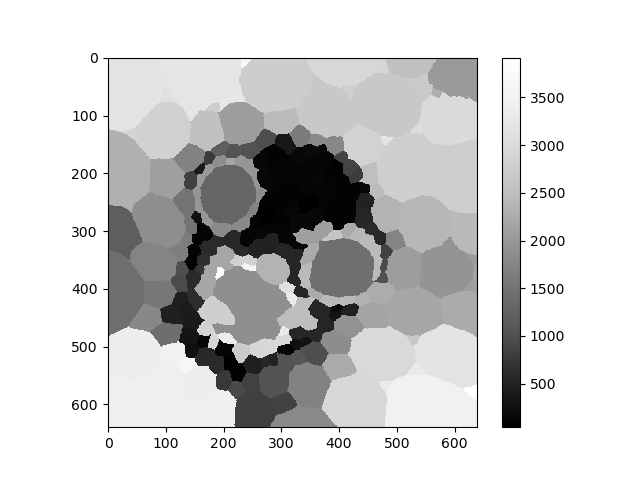
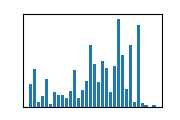

In [6]:
cle.standard_deviation_of_touching_neighbors_map(size_map_image, labels)